In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Preprocessing

In [2]:
url = 'https://github.com/SixZeraAlan/Kaggle-dataset/blob/4a0fbfceaba36ea876341303371fb47c067ce6f2/anime.csv?raw=true'
data = pd.read_csv(url)
# data = pd.read_csv('./anime.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [4]:
data.loc[0]

anime_id                                   32281
name                              Kimi no Na wa.
genre       Drama, Romance, School, Supernatural
type                                       Movie
episodes                                       1
rating                                      9.37
members                                   200630
Name: 0, dtype: object

In [5]:
#Processing Score data,view missing rating data
data[data['rating'].isnull()]

,anime_id,name,genre,type,episodes,rating,members
8968,34502,Inazma Delivery,"Action, Comedy, Sci-Fi",TV,10,NaN,32
9657,34309,Nananin no Ayakashi: Chimi Chimi Mouryou!! Gen...,"Comedy, Supernatural",TV,Unknown,NaN,129
10896,34096,Gintama (2017),"Action, Comedy, Historical, Parody, Samurai, S...",TV,Unknown,NaN,13383
10897,34134,One Punch Man 2,"Action, Comedy, Parody, Sci-Fi, Seinen, Super ...",TV,Unknown,NaN,90706
10898,30484,Steins;Gate 0,"Sci-Fi, Thriller",NaN,Unknown,NaN,60999
...,...,...,...,...,...,...,...
12274,34492,Nuki Doki! Tenshi to Akuma no Sakusei Battle -...,Hentai,OVA,Unknown,NaN,392
12279,34491,Sagurare Otome The Animation,Hentai,OVA,1,NaN,79
12280,34312,Saimin Class,Hentai,OVA,Unknown,NaN,240
12282,34388,Shikkoku no Shaga The Animation,Hentai,OVA,Unknown,NaN,195


In [6]:
#This is the rating of each anime
data['rating']

0        9.37
1        9.26
2        9.25
3        9.17
4        9.16
         ... 
12289    4.15
12290    4.28
12291    4.88
12292    4.98
12293    5.46
Name: rating, Length: 12294, dtype: float64

In [7]:
#Delete the missing data lines directly
data = data.dropna(subset=['rating'])

In [8]:
data.index=range(len(data))

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12064 entries, 0 to 12063
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12064 non-null  int64  
 1   name      12064 non-null  object 
 2   genre     12017 non-null  object 
 3   type      12064 non-null  object 
 4   episodes  12064 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12064 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 659.9+ KB


In [10]:
#This is the members of each anime
data['members']

0        200630
1        793665
2        114262
3        673572
4        151266
          ...  
12059       211
12060       183
12061       219
12062       175
12063       142
Name: members, Length: 12064, dtype: int64

In [11]:
#Processing Score data,view missing members data
data[data['members'].isnull()]

,anime_id,name,genre,type,episodes,rating,members


# K-Means



In [12]:
# set_fixed(): Set seeds to get same results
def set_fixed(SEED=101):
    np.random.seed(SEED)

    
# calc_dist(): Calculate the distance between the sample and the cluster center, 
#              and return the category closest to the cluster center

# params: sample: Single data sample, centers: k cluster centers
# return: Returns the id or index of the cluster center to which the current sample data belongs
def calc_dist(sample, centers):
    # The distance is denoted by the square of the difference
    dist = np.power(sample - centers, 2).sum(axis=1)
    # np.argmin(): Returns the indices of the minimum values along an axis.
    min_idx = dist.argmin()
    return min_idx

In [13]:
# visualize(): Visualize the current classification subset
def visualize(clusters, step):
    color = ["yellow", "red", "blue"]
    mark = ['o', 's', 'X']
    plt.figure(figsize=(8, 4))
    plt.title("step: {}".format(step))
    plt.xlabel("Density")
    plt.ylabel("Quality")
    # Use color to distinguish k clusters of data samples
    # This enumerated object can then be used directly for loops
    for i, cluster in enumerate(clusters):
        cluster = np.array(cluster)
        plt.scatter(cluster[:, 0], cluster[:, 1], c=color[i], marker=mark[i], s=50)
    plt.show()

In [14]:
# k_means(): return k cluster samples
# params： data：Samples-> set, k -> Clustering cluster number
# return：cluster class center for each cluster
def k_means(samples, k):

    data_number = len(samples)
    centers_flag = np.zeros((k,))

    # k cluster centers were randomly selected in the data
    centers = samples[np.random.choice(data_number, k, replace=False)]
    print(centers)

    step = 0
    while True:
        # The distance of each sample from the cluster center is calculated, and then allocated to the cluster center with the shortest distance
        clusters = [[] for i in range(k)]
        for sample in samples:
            ci = calc_dist(sample, centers)
            clusters[ci].append(sample)

        # Visualize the current cluster structure
        if step % 4 == 0:
            visualize(clusters, step)

        # After clustering, the center point of each cluster is updated to obtain the cluster center and proceed to the next step of clustering
        for i, sub_clusters in enumerate(clusters):
            new_center = np.array(sub_clusters).mean(axis=0)
            # If the value changes, it is updated. If there is no change, the flag bit is set to 1. When all the flag bits are 1, the loop is exited
            if (centers[i] != new_center).all():
                centers[i] = new_center
            else:
                centers_flag[i] = 1

        step += 1
#         print("step:{}".format(step), "\n", "centers:{}".format(centers))
        if centers_flag.all():
            break

    return centers

In [15]:
# split_data(): Classify the cluster according to the cluster center and obtain the final classification result
# params: samples are all data samples, and centers are cluster centers with good clustering
# return: returns a subarray
def split_data(samples, centers):

    # The number of clusters was obtained from the center sample
    k = len(centers)
    clusters = [[] for i in range(k)]
    for sample in samples:
        ci = calc_dist(sample, centers)
        clusters[ci].append(sample)

    return clusters

[[ 949.      6.22]
 [2497.      6.86]
 [  47.      4.11]]


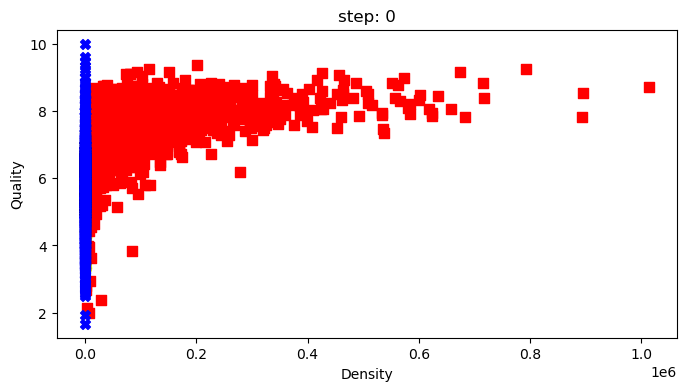

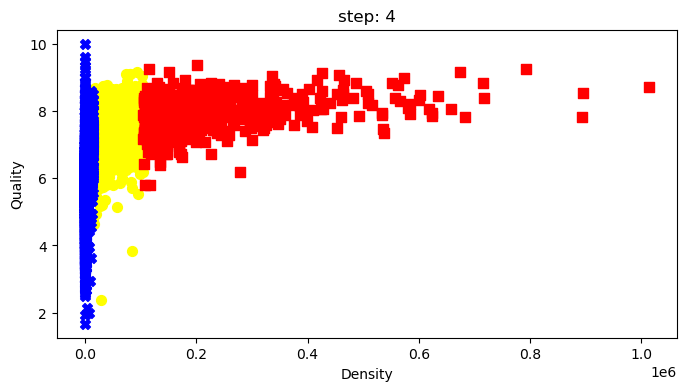

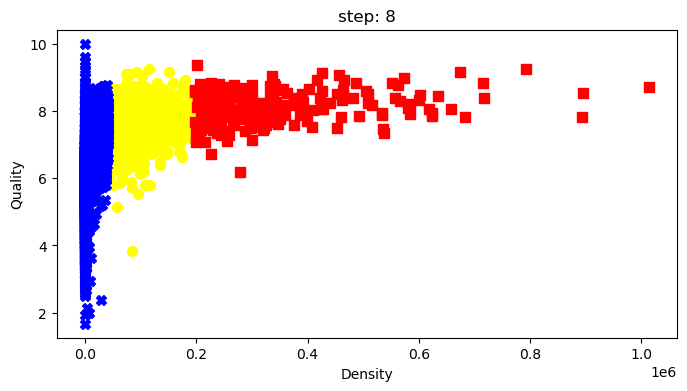

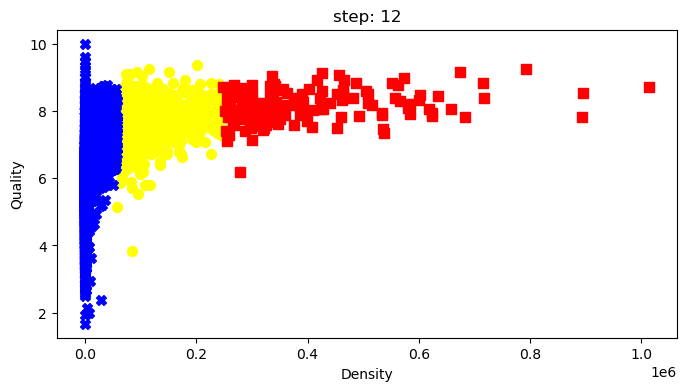

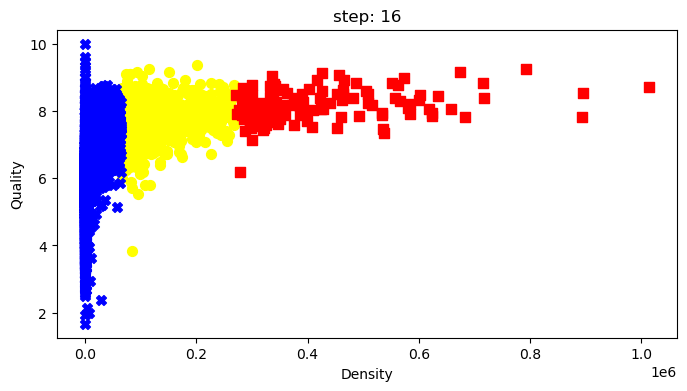

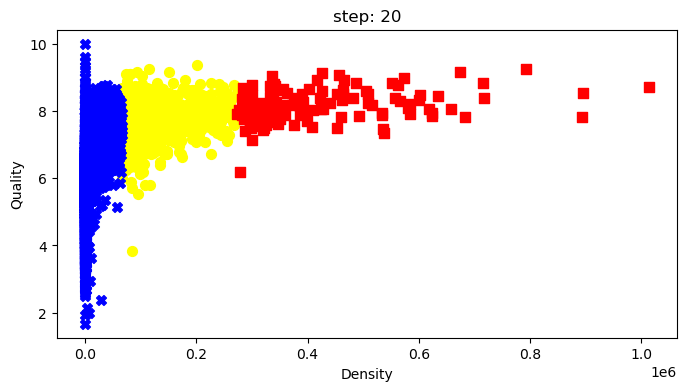

In [16]:
if __name__ == '__main__':

    set_fixed()
    # Import data
    samples = data[["members", "rating"]].values

    centers = k_means(samples=samples, k=3)
    clusters = split_data(samples=samples, centers=centers)
#     print(clusters)

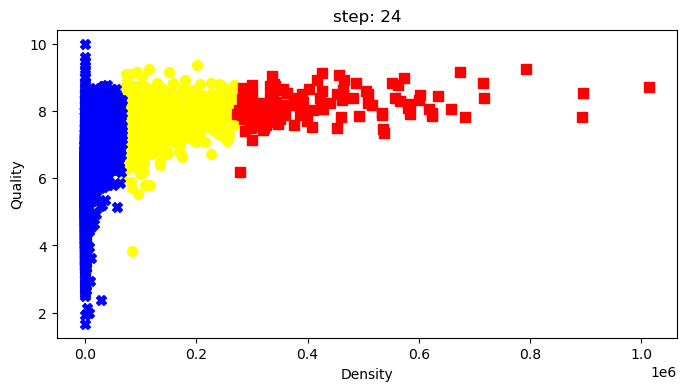

In [17]:
visualize(clusters, 24)